In [1]:


import numpy as np
import matplotlib.pyplot as plt
from elephant.spike_train_generation import inhomogeneous_poisson_process
from elephant.gpfa import GPFA
import quantities as pq
import neo
from viziphant.gpfa import plot_trajectories

In [2]:

#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True


In [3]:
#@title Data loading
import numpy as np


fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

In [32]:
def get_trials_mv_rtl(dat):
    ind=(dat['response'][:]==-1)
    left_act=dat['spks'][:,ind]
    return left_act


def get_trials_mv_ltr(dat):
    ind=(dat['response'][:]==1)
    left_act=dat['spks'][:,ind]
    return left_act
     
def get_trials_nogo(dat):
    ind=(dat['response'][:]==0)
    left_act=dat['spks'][:,ind]
    return left_act   


def get_spike_times(spikes):
    
    spike_times_trials=list()
    for i in range(spikes.shape[1]):
        trial=spikes[:,i]
        #neuron_time=list()
        neurons_in_trial=list()
        for neuron in trial:
            indices=(neuron[:]!=0)
            spike_train_=np.multiply(indices,np.arange(250))
            #spike_train_neuron=np.hstack([[0],spike_train_[indices]])
            spike_train_neuron=spike_train_[indices]
            neurons_in_trial.append(neo.SpikeTrain(spike_train_neuron*10*pq.ms,t_stop=250.0))

        spike_times_trials.append(neurons_in_trial)
    return spike_times_trials

            
            
            
            
        
        

In [ ]:
dat=alldat[4]
spikes=dat['spks']
trials=spikes.shape[1]
spike_trains=get_spike_times(spikes)


In [6]:
"""from elephant.gpfa import GPFA


# specify fitting parameters
bin_size = 10.0*pq.ms
latent_dimensionality = 2
gpfa_2dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality)"""


In [30]:
"""gpfa_2dim.fit(spike_trains[:trials])
trajectories = gpfa_2dim.transform(spike_trains)"""

Initializing parameters using factor analysis...

Fitting GPFA model...


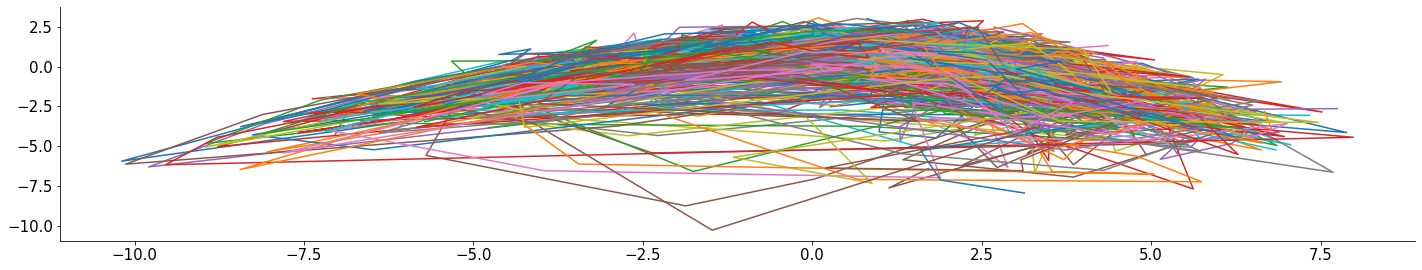

In [8]:
"""for single_trial_trajectory in trajectories:

    plt.plot(single_trial_trajectory[0], single_trial_trajectory[1], '-')"""

In [9]:
len(trajectories)

107

In [10]:
print(trajectories.shape,spikes.shape)

(107,) (734, 214, 250)


In [7]:
left_trials=get_trials_mv_rtl(dat)
right_trials=get_trials_mv_ltr(dat)
nogo_trials=get_trials_nogo(dat)

In [8]:
left_spike_times=get_spike_times(left_trials)
right_spike_times=get_spike_times(right_trials)
nogo_spike_times=get_spike_times(nogo_trials)

In [13]:
"""trajectories_left = gpfa_2dim.transform(left_spike_times)
trajectories_right = gpfa_2dim.transform(right_spike_times)
trajectories_nogo=gpfa_2dim.transform(nogo_spike_times)"""

'trajectories_left = gpfa_2dim.transform(left_spike_times)\ntrajectories_right = gpfa_2dim.transform(right_spike_times)\ntrajectories_nogo=gpfa_2dim.transform(nogo_spike_times)'

In [14]:
"""for single_trial_trajectory in trajectories_left:
    plt.scatter(single_trial_trajectory[0], single_trial_trajectory[1], c='blue')

   
for single_trial_trajectory in trajectories_right:
    plt.scatter(single_trial_trajectory[0], single_trial_trajectory[1], c='red')

for single_trial_trajectory in trajectories_nogo:
    plt.scatter(single_trial_trajectory[0], single_trial_trajectory[1], c='limegreen')"""
    

"for single_trial_trajectory in trajectories_left:\n    plt.scatter(single_trial_trajectory[0], single_trial_trajectory[1], c='blue')\n\n   \nfor single_trial_trajectory in trajectories_right:\n    plt.scatter(single_trial_trajectory[0], single_trial_trajectory[1], c='red')\n\nfor single_trial_trajectory in trajectories_nogo:\n    plt.scatter(single_trial_trajectory[0], single_trial_trajectory[1], c='limegreen')"

In [15]:
"""single_trial_trajectory = trajectories_left[0]
plt.scatter(single_trial_trajectory[0], single_trial_trajectory[1], c='blue')

single_trial_trajectory = trajectories_right[0]
plt.scatter(single_trial_trajectory[0,0:12], single_trial_trajectory[1,0:12], c='red')
#print(single_trial_trajectory )"""

"single_trial_trajectory = trajectories_left[0]\nplt.scatter(single_trial_trajectory[0], single_trial_trajectory[1], c='blue')\n\nsingle_trial_trajectory = trajectories_right[0]\nplt.scatter(single_trial_trajectory[0,0:12], single_trial_trajectory[1,0:12], c='red')\n#print(single_trial_trajectory )"

In [6]:
from elephant.gpfa import GPFA


# specify fitting parameters
bin_size = 10.0*pq.ms
latent_dimensionality = 3
gpfa_3dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality)

gpfa_3dim.fit(spike_trains)

Initializing parameters using factor analysis...

Fitting GPFA model...


GPFA(bin_size=array(10.) * ms)

In [9]:
trajectories_left = gpfa_3dim.transform(left_spike_times)
trajectories_right = gpfa_3dim.transform(right_spike_times)
trajectories_nogo=gpfa_3dim.transform(nogo_spike_times)

/tmp/ipykernel_14848/945788250.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/home/himanshu/Coding/NMA/steinmetz-analysis/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


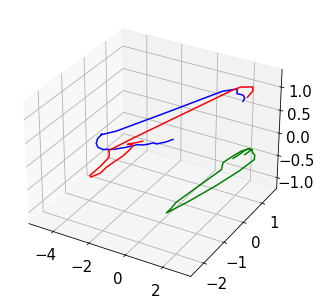

In [11]:


fig = plt.figure()
ax = Axes3D(fig)


average_trajectory_left= np.mean(trajectories_left, axis=0)
average_trajectory_right= np.mean(trajectories_right, axis=0)
average_trajectory_nogo= np.mean(trajectories_nogo, axis=0)



ax.plot(average_trajectory_left[0], average_trajectory_left[1],average_trajectory_left[2], c='blue')
ax.plot(average_trajectory_right[0], average_trajectory_right[1],average_trajectory_right[2], c='red')
ax.plot(average_trajectory_nogo[0], average_trajectory_nogo[1],average_trajectory_nogo[2], c='green')
#ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='limegreen')
plt.show()

/tmp/ipykernel_14848/3350303745.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


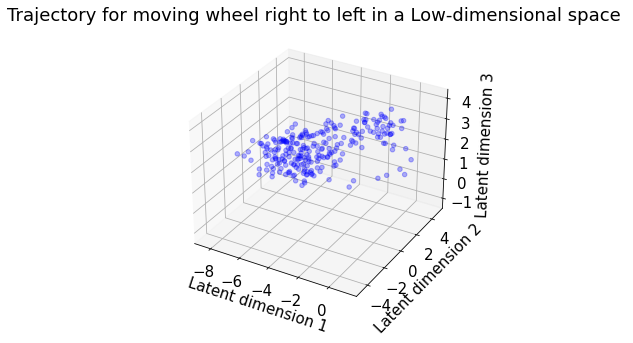

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title(f'Trajectory for moving wheel right to left in a Low-dimensional space ')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')

for single_trial_trajectory in trajectories_left[:10]:
    sixe=len(single_trial_trajectory[0])
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='blue',alpha=0.3)

    



25


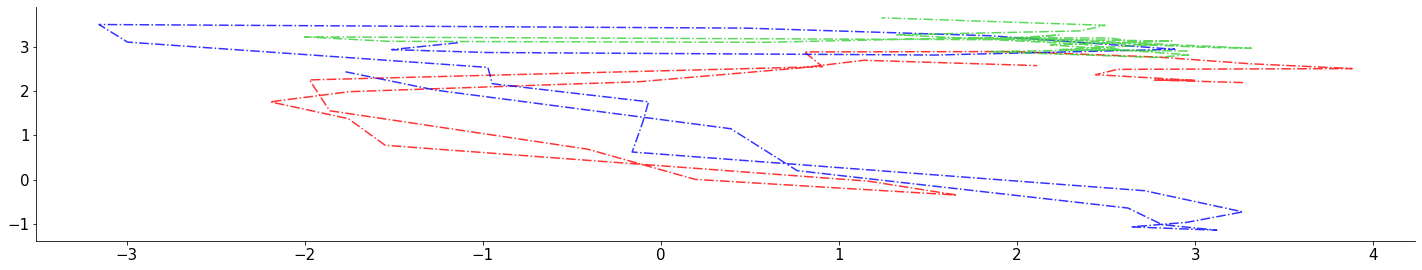

In [31]:
"""fig = plt.figure()
ax = Axes3D(fig)

ax.set_title(f'Trajectory for moving wheel left to right in a Low-dimensional space ')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')"""

for single_trial_trajectory in trajectories_right[:1]:
    plt.plot(single_trial_trajectory[1], single_trial_trajectory[2], c='red',alpha=0.8,  linestyle='-.')#single_trial_trajectory[2],
    
for single_trial_trajectory in trajectories_left[:1]:

    plt.plot(single_trial_trajectory[1], single_trial_trajectory[2], c='blue',alpha=0.8, linestyle='-.')#single_trial_trajectory[2],

for single_trial_trajectory in trajectories_nogo[:1]:
    plt.plot(single_trial_trajectory[1], single_trial_trajectory[2], c='limegreen',alpha=0.8, linestyle='-.')#,single_trial_trajectory[2]
    
    #ax.view_init(elev=-10,azim=90)
print(len(single_trial_trajectory[1]))

#ax.plot(average_trajectory_right[0], average_trajectory_right[1],average_trajectory_right[2], c='black',lw=3)

/tmp/ipykernel_14848/3758232065.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


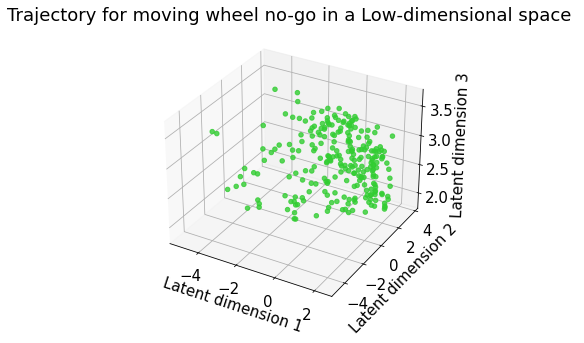

In [14]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_title(f'Trajectory for moving wheel no-go in a Low-dimensional space ')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')

for single_trial_trajectory in trajectories_nogo[:10]:
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='limegreen',alpha=0.8)
    



In [22]:
single_trial_trajectory.shape

(3, 25)

"for single_trial_trajectory in trajectories_right[0:1]:\n    sie=len(single_trial_trajectory[0])\n    plt.scatter(single_trial_trajectory[2][0],single_trial_trajectory[0][0], c='red')\n\nfor single_trial_trajectory in trajectories_nogo[0:1]:\n    sie=len(single_trial_trajectory[0])\n    plt.scatter(single_trial_trajectory[2][0],single_trial_trajectory[0][0], c='limegreen')\n#ax.plot(average_trajectory_left[0],average_trajectory_left[2], c='yellow')"

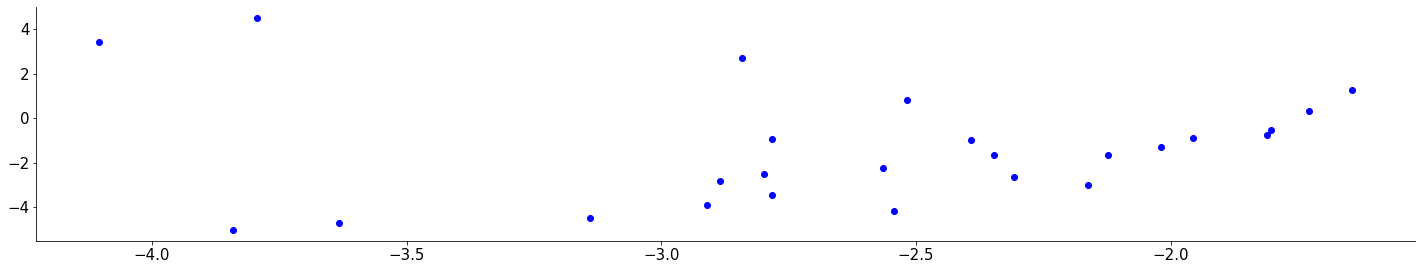

In [64]:
"""fig = plt.figure()
ax = Axes3D(fig)
ax.set_title(f'Trajectory for moving wheel right to left in a Low-dimensional space ')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')"""

for single_trial_trajectory in trajectories_left[0:1]:
    for i in range(len(single_trial_trajectory[2])):
        plt.scatter(single_trial_trajectory[2][i],single_trial_trajectory[0][i], c='blue')
    
"""for single_trial_trajectory in trajectories_right[0:1]:
    sie=len(single_trial_trajectory[0])
    plt.scatter(single_trial_trajectory[2][0],single_trial_trajectory[0][0], c='red')

for single_trial_trajectory in trajectories_nogo[0:1]:
    sie=len(single_trial_trajectory[0])
    plt.scatter(single_trial_trajectory[2][0],single_trial_trajectory[0][0], c='limegreen')
#ax.plot(average_trajectory_left[0],average_trajectory_left[2], c='yellow')"""

/tmp/ipykernel_5023/3056586538.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


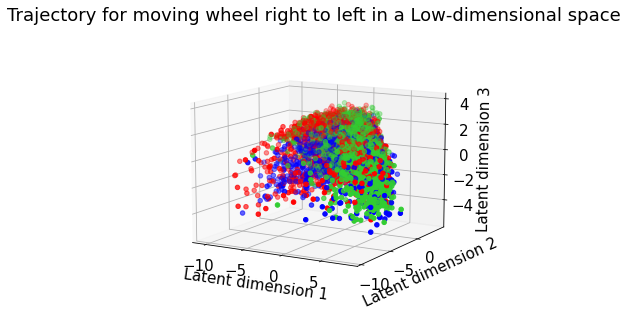

In [24]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title(f'Trajectory for moving wheel right to left in a Low-dimensional space ')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')

for single_trial_trajectory in trajectories_left:
    sixe=len(single_trial_trajectory[0])
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='blue')#,alpha=0.1)

    
#ax.plot(average_trajectory_left[0], average_trajectory_left[1],average_trajectory_left[2], c='yellow')

for single_trial_trajectory in trajectories_right:
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='red')#,alpha=0.11)
    
for single_trial_trajectory in trajectories_nogo:
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='limegreen')#,alpha=0.11)
    

ax.view_init(elev=11,azim=300)

/tmp/ipykernel_5023/1400533697.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


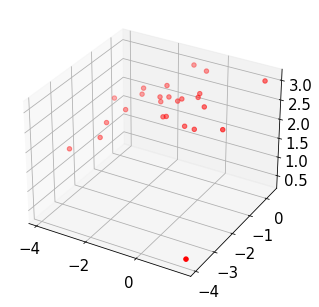

In [25]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='red')

/home/himanshu/Coding/NMA/steinmetz-analysis/.venv/lib/python3.9/site-packages/viziphant/gpfa.py:535: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection=projection, aspect='auto')


(<Figure size 1440x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\tilde{\\mathbf{x}}_{0,:}$', ylabel='$\\tilde{\\mathbf{x}}_{1,:}$'>)

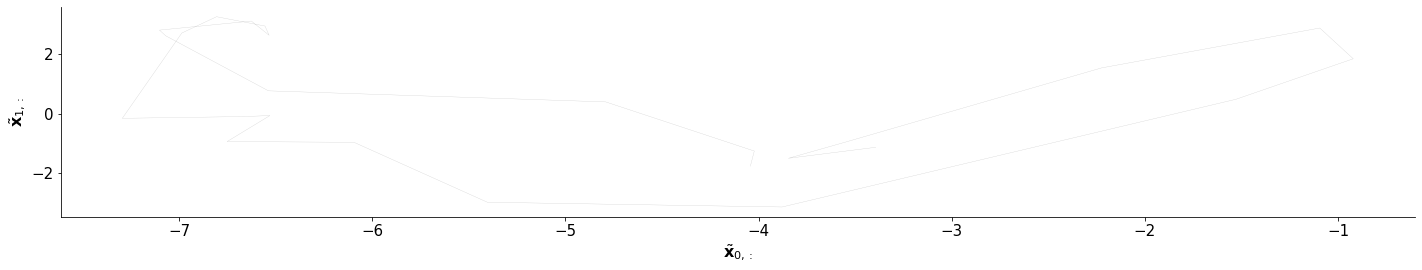

In [10]:
plot_trajectories(trajectories_left[0:1], gpfa_3dim)

In [ ]:
for dat in alldat:
    left_trials=get_trials_mv_rtl(dat)
    right_trials=get_trials_mv_ltr(dat)
    nogo_trials=get_trials_nogo(dat)

    spikes=dat['spks']
    trials=spikes.shape[1]
    spike_trains=get_spike_times(spikes)
    
    left_spike_times=get_spike_times(left_trials)
    right_spike_times=get_spike_times(right_trials)
    nogo_spike_times=get_spike_times(nogo_trials)
    
    #fitting the data via gpfa
    bin_size = 10.0*pq.ms
    latent_dimensionality = 3
    gpfa_3dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality)

    gpfa_3dim.fit(spike_trains)
    
    ax1 = Axes3D(fig)

    ax1.set_title(f'Trajectory for moving wheel no-go in a Low-dimensional space ')
    ax1.set_xlabel('Latent dimension 1')
    ax1.set_ylabel('Latent dimension 2')
    ax1.set_zlabel('Latent dimension 3')

    for single_trial_trajectory in trajectories_nogo:
        ax1.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='limegreen',alpha=0.1)